# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [2]:
import pandas as pd

## imports for Python, Pandas

In [63]:
import json
from pandas import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [61]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [64]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [65]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [2]:
# Solution to Exercise 1: Apply .value_count() dataframe method to count the number of projects for each country 
# and slice the Series to print and sort the top 10 countries with the most rows in the dataframe
import pandas as pd
wbp_df = pd.read_json('data/world_bank_projects.json')
top10countries = wbp_df['countryname'].value_counts()[:10]
top10countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

[Text(0, 0.5, 'Countries'), Text(0.5, 0, 'No. of Projects')]

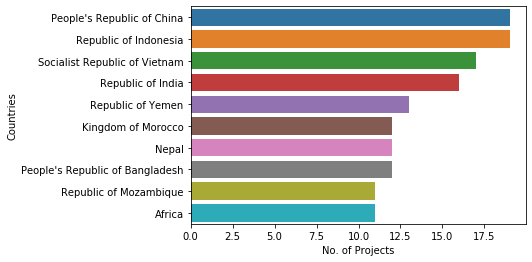

In [3]:
# Cont. Exercise 1: Adding Visualization
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.barplot(y = top10countries.index, x = top10countries.values,ci=None)
fig.set(xlabel='No. of Projects', ylabel='Countries')


In [4]:
# Solution to Exercise 2: Create a new dataframe (mjtheme_df) with Code and Name as 
# columns adds rows for each pair of dictionaries in each row in the dataframe
mjtheme_df = pd.DataFrame([d for pair in wbp_df['mjtheme_namecode'] for d in pair])
mjthemes = mjtheme_df.groupby('code').count()
mjthemes = mjthemes.rename(columns={'name':'Count'})
mjthemes = mjthemes.sort_values(by=['Count'],ascending=False)[:10]
mjthemes

,Count
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Code')]

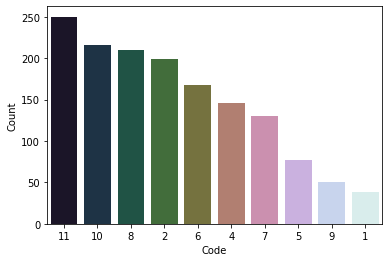

In [68]:
# Cont. Exercise 2: Adding Visualization
fig = sns.barplot(y = mjthemes['Count'],x=mjthemes.index,order=mjthemes.index,ci=None,palette='cubehelix')
fig.set(xlabel='Code', ylabel='Count')


In [74]:
# Solution to Exercise 3: Creating a new dataframe from mjtheme_namecode column 
# and forward-fill in missing names

# create list of dictionaries from the mjtheme_namecode column
dict_list = [d for pair in wbp_df['mjtheme_namecode'] for d in pair]

# create new DataFrame (mjtheme_df) from list of dictionaries
mjtheme_df = pd.DataFrame(dict_list).set_index('code').sort_index() 

# show there are missing names
mjtheme_df[mjtheme_df['name']=='']

,name
code,
1,
1,
1,
1,
1,
...,...
8,
8,
9,


In [75]:
# forward fill the missing names using .replace() method
mjtheme_df = mjtheme_df.replace("",method='ffill')
mjtheme_df

,name
code,
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
...,...
9,Urban development
9,Urban development
9,Urban development


In [76]:
# show there are no more missing names
mjtheme_df[mjtheme_df['name']=='']

,name
code,
